<a href="https://colab.research.google.com/github/iamjhelo/ArtificialIntelligence/blob/main/AI_KPOP_EXITO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MOBILE LEGENDS PROFESSIONAL LEAGUE - PHILIPPINES (SEASON 7)

## Prepared by: AJ Exito - MSIB 2021

  
MOBILE LEGENDS: BANG BANG PROFESSIONAL LEAGUE (MPL) is the largest and most prestigious mobile games competition in Southeast Asia. In the Philippines, the league was officially established in 2018. MPL-PH S7 is now starting, currently on its Regular Season going to Playoffs, where 10 teams will battle for a share of the $120,000 USD prize pool.

Teams competing for MPL-PH S7 includes: Bren Esports (Defending Champion), Blacklist International, Onic Philippines, Aura Philippines, Cignal Ultra, Work-Auster Force, Execration, Smart Omega PH Esports, Nexplay Esports and Laus Playbook Esports.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_dir = '/content/drive/My Drive/MSIB Classes/Artificial Intelligence/ACT1/'

In [3]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

os.listdir(data_dir)

['AI_Kpop.xlsx', 'AI_Kpop.ipynb', 'AI_Kpop_v2.xlsx', 'AI_KPOP_EXITO.ipynb']

In [4]:
df_KPOP = pd.read_excel(data_dir+'AI_Kpop_v2.xlsx')
dummy=df_KPOP
dummy.head()

,artist,album,release_date,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,blackpink,THE ALBUM,2020-10-02,How You Like That,0.04650,0.812,0.761,0.000135,0.0601,-5.222,0.0812,130.032,0.344
1,blackpink,THE ALBUM,2020-10-02,Ice Cream (with Selena Gomez),0.03170,0.790,0.701,0.000081,0.0311,-4.810,0.3650,159.972,0.910
2,blackpink,THE ALBUM,2020-10-02,Pretty Savage,0.00886,0.701,0.556,0.000122,0.1060,-7.420,0.0414,152.045,0.333
3,blackpink,THE ALBUM,2020-10-02,Bet You Wanna (feat. Cardi B),0.00465,0.653,0.662,0.000000,0.0626,-6.168,0.1620,111.712,0.674
4,blackpink,THE ALBUM,2020-10-02,Lovesick Girls,0.00559,0.654,0.707,0.000000,0.0873,-5.661,0.0664,127.970,0.448


In [5]:
print(df_KPOP.shape)

(373, 13)


In [6]:
df_KPOP.columns

Index(['artist', 'album', 'release_date', 'name', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

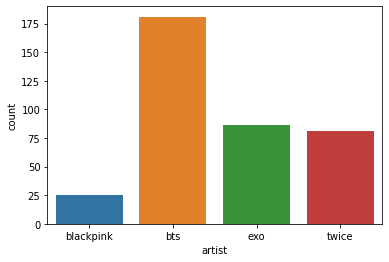

In [8]:
import seaborn as sns
sns.countplot(df_KPOP['artist'],label="Count")
plt.show()

In [9]:
num=(df_KPOP.groupby('artist').size()/df_KPOP.groupby('artist').size().sum())**2
#print("Population per class: {}\n".format(df_state))
print("Proportion Chance Criterion = {}%".format(100*num.sum()))
print("1.25*Proportion Chance Criterion = {}%".format(1.25*100*num.sum()))

Proportion Chance Criterion = 34.02813216511295%
1.25*Proportion Chance Criterion = 42.53516520639119%


Population per class:             0
blackpink   25
bts        181
exo         86
twice       81
Proportion Chance Criterion: 34.03%
1.25 * Proportion Chance Criterion: 42.54%


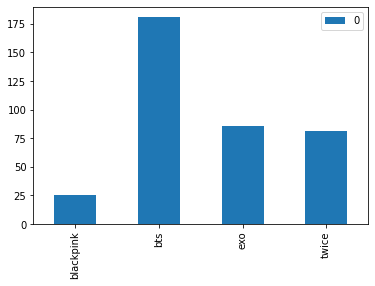

In [10]:
from collections import Counter
state_counts = Counter(df_KPOP['artist'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2

print("Population per class:{}".format(df_state))

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

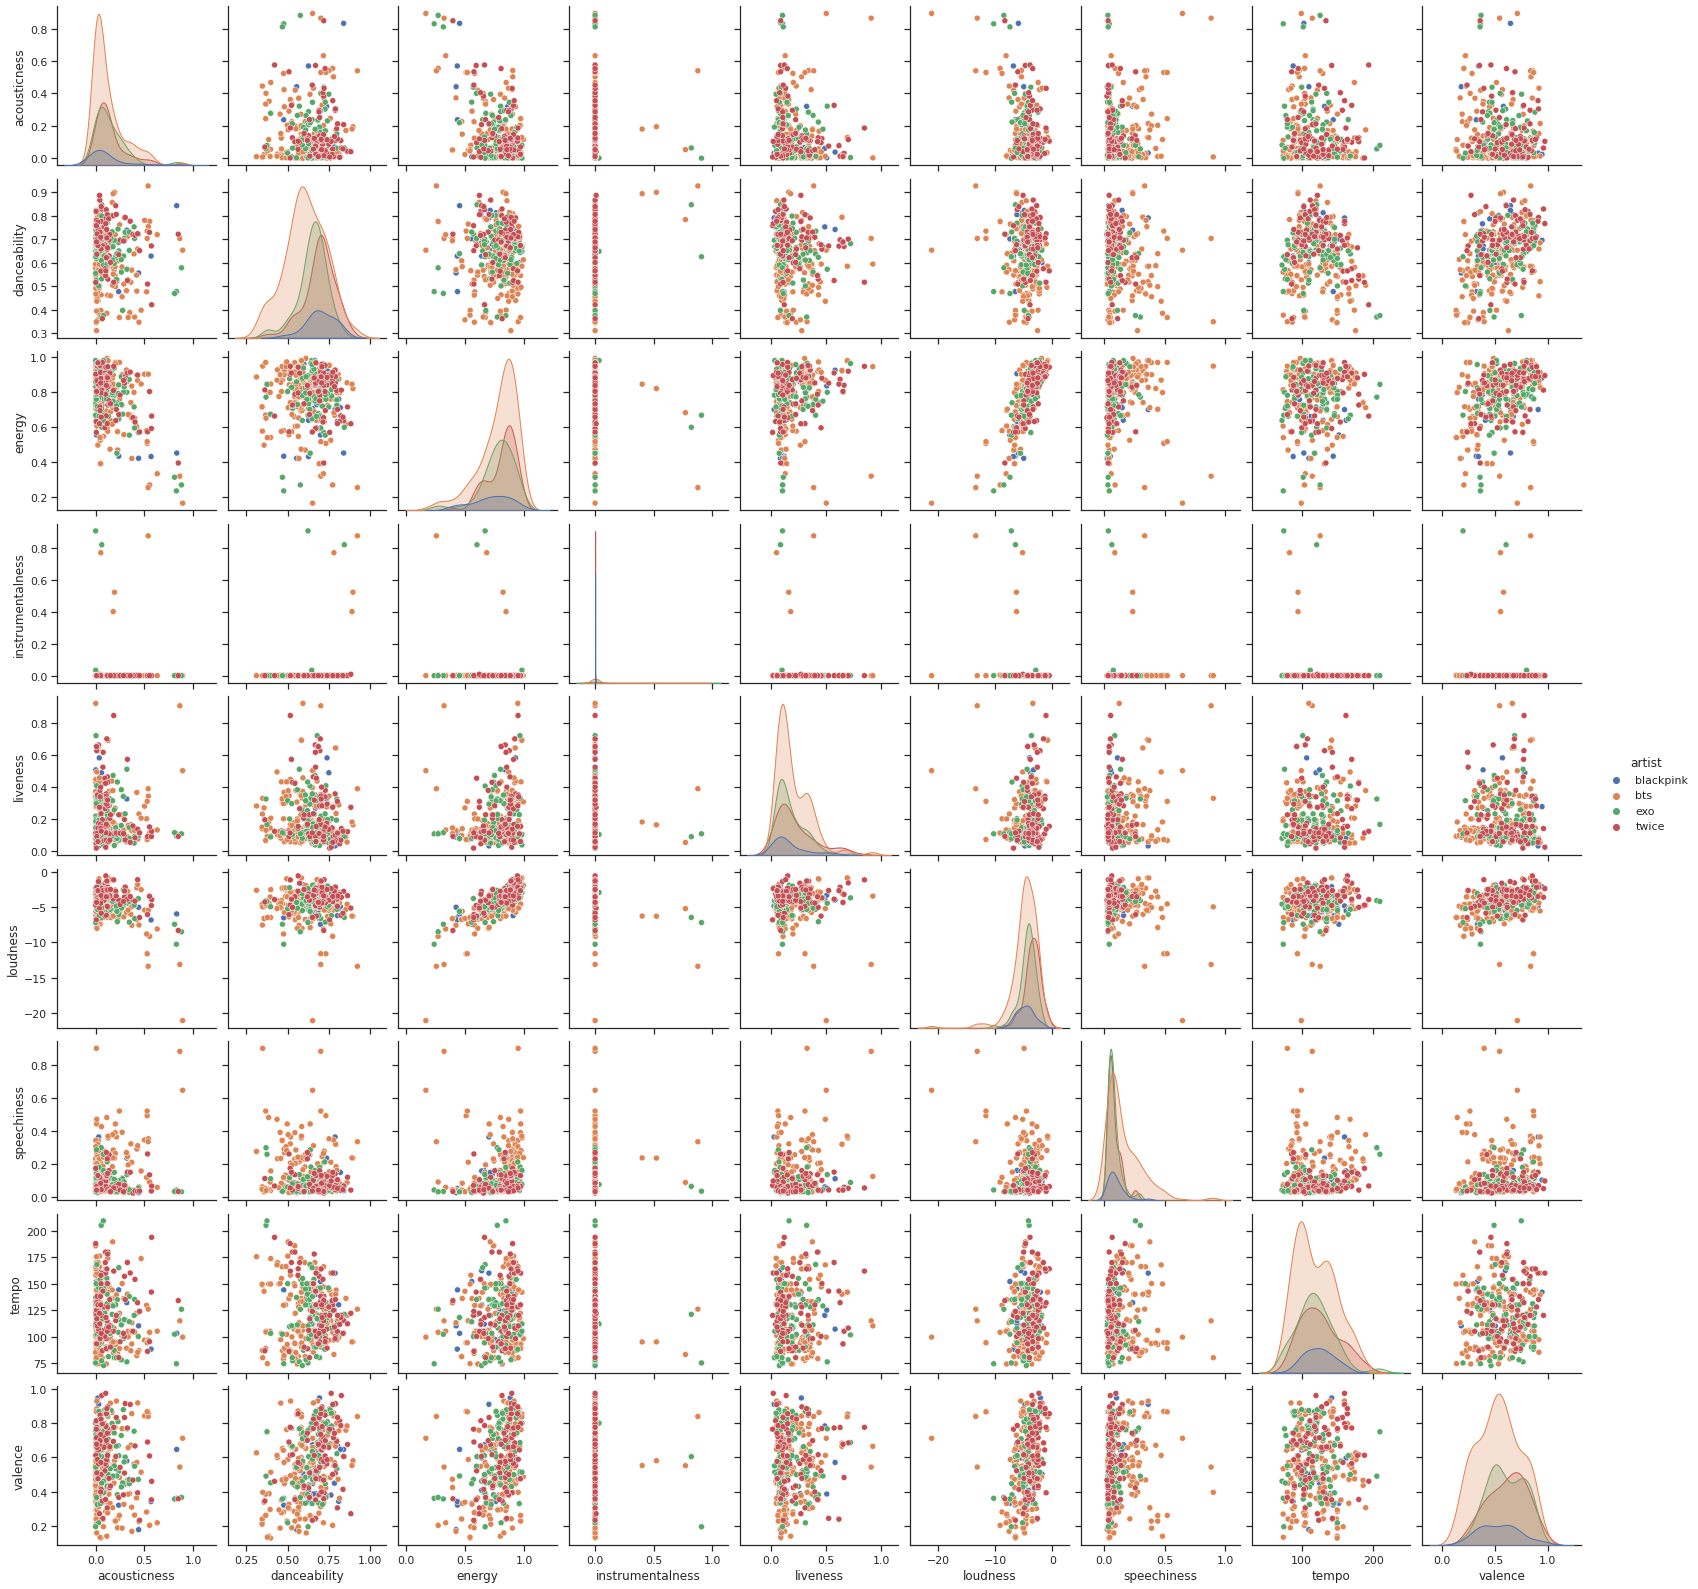

In [11]:
import seaborn as sns
sns.set(style="ticks")

df = df_KPOP[['artist','acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']]
sns.pairplot(df, hue="artist", diag_kind='kde')

pass

# Step 1: Look at the missing values

In [12]:
df_KPOP.isnull().sum()

artist              0
album               0
release_date        0
name                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
dtype: int64

# Steps 2 and 3. Remove or Input the missing values

In [13]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)



X_transition = pd.DataFrame(df_KPOP)
X_clean = DataFrameImputer().fit_transform(X_transition)

X_clean.isnull().sum()

artist              0
album               0
release_date        0
name                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
dtype: int64

In [14]:
X_clean.head()

,artist,album,release_date,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,blackpink,THE ALBUM,2020-10-02,How You Like That,0.04650,0.812,0.761,0.000135,0.0601,-5.222,0.0812,130.032,0.344
1,blackpink,THE ALBUM,2020-10-02,Ice Cream (with Selena Gomez),0.03170,0.790,0.701,0.000081,0.0311,-4.810,0.3650,159.972,0.910
2,blackpink,THE ALBUM,2020-10-02,Pretty Savage,0.00886,0.701,0.556,0.000122,0.1060,-7.420,0.0414,152.045,0.333
3,blackpink,THE ALBUM,2020-10-02,Bet You Wanna (feat. Cardi B),0.00465,0.653,0.662,0.000000,0.0626,-6.168,0.1620,111.712,0.674
4,blackpink,THE ALBUM,2020-10-02,Lovesick Girls,0.00559,0.654,0.707,0.000000,0.0873,-5.661,0.0664,127.970,0.448


In [15]:
X_clean = X_clean.drop(['artist','album','release_date','name'], axis=1)

# Step 4. Handle Categorical Data, for simplicity let's just One Hat Encode all the categorical values

None, all data are numerical.

# Step 5: Apply Scaler

In [16]:
X_column_names =X_clean.columns

In [17]:
from sklearn.preprocessing import MinMaxScaler
sscaler = MinMaxScaler()
XX = sscaler.fit_transform(X_clean.astype(np.float64)) #You will loss the column names

In [18]:
XX_df = pd.DataFrame(data = XX,columns = X_column_names) # Return the column names
XX_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.051934,0.814634,0.719128,0.000149,0.047046,0.772164,0.064295,0.420093,0.253555
1,0.035358,0.778862,0.646489,0.000089,0.015019,0.792179,0.387825,0.638697,0.924171
2,0.009777,0.634146,0.470944,0.000134,0.097736,0.665387,0.018924,0.580819,0.240521
3,0.005062,0.556098,0.599274,0.000000,0.049807,0.726208,0.156407,0.286332,0.644550
4,0.006115,0.557724,0.653753,0.000000,0.077084,0.750838,0.047424,0.405038,0.376777


# Step 6:  Now let's run an automated Machine Learning to the above processed data

Below we combine the notebook codes previously shared into a single running code to create an **Automated ML**

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

Number_trials=20

def train_knn(X, y):
    score_train = []
    score_test = []

    for seed in range(Number_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        neighbors_settings = range(1,70)
        acc_train = []
        acc_test = []

        for n_neighbors in neighbors_settings:   
            clf = KNeighborsClassifier(n_neighbors=n_neighbors) # build the model 
            clf.fit(X_train, y_train)    
            acc_train.append(clf.score(X_train, y_train))
            acc_test.append(clf.score(X_test, y_test))

        score_train.append(acc_train)
        score_test.append(acc_test)   
        
    score = np.mean(score_test, axis=0)
    run_time = (time.time() - start_time)
    return ['kNN', np.amax(score), 'N_Neighbor = {0}'.format(np.argmax(score)+1), 'NA',run_time]

def train_logistic(X, y, reg):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            if reg == 'l1':
                lr = LogisticRegression(C=alpha_run, penalty=reg, solver='liblinear').fit(X_train, y_train)
            if reg == 'l2':
                lr = LogisticRegression(C=alpha_run, penalty=reg, dual=False).fit(X_train, y_train)
            
            
            training_accuracy.append(lr.score(X_train, y_train))
            test_accuracy.append(lr.score(X_test, y_test))
            coefs=lr.coef_ 
            weighted_coefs.append(coefs) #append all the computed coefficients per trial
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
    
    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials 
    #print(mean_coefs) 
    score = np.mean(score_test, axis=0)
    
    #Plot the weight of the parameters 
    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
     
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Logistic ({0})'.format(reg), np.amax(score), \
            'C = {0}'.format(C[np.argmax(score)]), top_predictor, run_time]

def train_svm(X, y, reg):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            if reg == 'l1':
                svc = LinearSVC(C=alpha_run, penalty=reg, loss='squared_hinge', dual=False).fit(X_train, y_train)
            if reg == 'l2':
                svc = LinearSVC(C=alpha_run, penalty=reg).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = svc.coef_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Linear SVM ({0})'.format(reg), np.amax(score), \
            'C = {0}'.format(C[np.argmax(score)]), top_predictor,run_time]

def train_RF(X, y, reg):
    max_features_tuning=[0.1, .2, .3, .4, .5, .7, .8]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for max_features_run in max_features_tuning:
            svc = RandomForestClassifier(n_estimators=100, max_features=max_features_run).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = svc.feature_importances_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Random Forest', np.amax(score), \
            'Max_features = {0}'.format(max_features_tuning[np.argmax(score)]), top_predictor,run_time]

def train_GBM(X, y, reg):
    max_features_tuning=[0.1, .2, .3, .4, .5, .7, .8]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for max_features_run in max_features_tuning:
            svc = GradientBoostingClassifier(n_estimators=100,max_depth=3, max_features=max_features_run).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = svc.feature_importances_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Gradient Boosting Method', np.amax(score), \
            'Max_features = {0}'.format(max_features_tuning[np.argmax(score)]), top_predictor,run_time]

['kNN', 0.5367021276595745, 'N_Neighbor = 1', 'NA', 26.387131690979004]
26.387131690979004 seconds
['Logistic (l1)', 0.5968085106382979, 'C = 5', 'instrumentalness', 13.255990505218506]
13.255990505218506 seconds
['Linear SVM (l1)', 0.6005319148936171, 'C = 5', 'instrumentalness', 7.655921220779419]
7.655921220779419 seconds
['Random Forest', 0.6175531914893616, 'Max_features = 0.4', 'danceability', 27.123616695404053]
27.123616695404053 seconds
['Gradient Boosting Method', 0.6090425531914894, 'Max_features = 0.4', 'speechiness', 54.870837450027466]
27.123616695404053 seconds


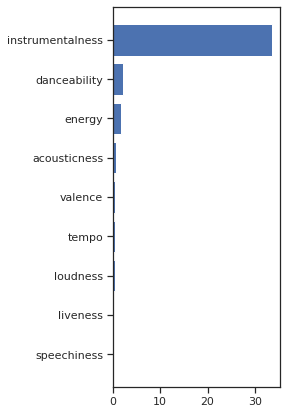

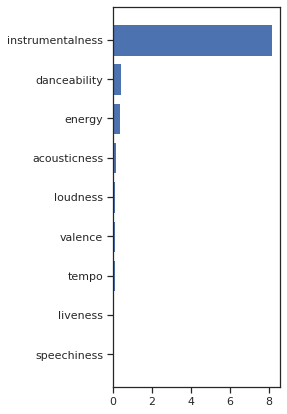

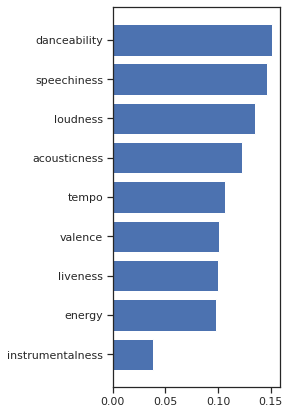

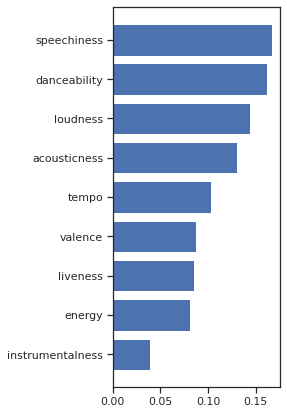

In [27]:
X = XX_df

y = df_KPOP['artist']

import time

start_time = time.time()
a = train_knn(X,y)
print(a)
print("%s seconds" % a[4])

start_time = time.time()
c = train_logistic(X,y,reg='l1')
print(c)
print("%s seconds" % c[4])

start_time = time.time()
e = train_svm(X,y,reg='l1')
print(e)
print("%s seconds" % e[4])

start_time = time.time()
f = train_RF(X,y,reg='none')
print(f)
print("%s seconds" % f[4])

start_time = time.time()
g = train_GBM(X,y,reg='none')
print(g)
print("%s seconds" % f[4])

In [28]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Top Predictor Variable', 'Run Time']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = c
df2.loc[2] = e
df2.loc[3] = f
df2.loc[4] = g

df2

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable,Run Time
0,kNN,0.536702,N_Neighbor = 1,NA,26.387132
1,Logistic (l1),0.596809,C = 5,instrumentalness,13.255991
2,Linear SVM (l1),0.600532,C = 5,instrumentalness,7.655921
3,Random Forest,0.617553,Max_features = 0.4,danceability,27.123617
4,Gradient Boosting Method,0.609043,Max_features = 0.4,speechiness,54.870837


# Step 7: How to save the weights 

Many ways to save it, you can use **joblib** (you can also use **cPickle**, **dill**)

### Step 1: Load Data

In [29]:
from sklearn.model_selection import train_test_split

X = XX_df
y = df_KPOP['artist']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Step 2: Train a given ML model (here we are using Random Forest)

In [30]:
import joblib
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_features=0.4)
rf.fit(X_train, y_train)

# save
joblib.dump(rf, "AI_Kpop_v2.joblib")

['AI_Kpop_v2.joblib']

### Step 3: Access the weight without retraining again, Step 2 can be skipped after the first run

In [32]:
import joblib

# load
loaded_rf = joblib.load("AI_Kpop_v2.joblib")
loaded_rf.predict(X_test)

array(['twice', 'bts', 'bts', 'bts', 'bts', 'bts', 'bts', 'bts', 'bts',
       'exo', 'bts', 'bts', 'bts', 'bts', 'bts', 'bts', 'bts', 'bts',
       'bts', 'exo', 'bts', 'bts', 'twice', 'bts', 'twice', 'bts', 'bts',
       'twice', 'bts', 'twice', 'twice', 'bts', 'exo', 'twice', 'exo',
       'twice', 'bts', 'bts', 'exo', 'twice', 'twice', 'bts', 'twice',
       'twice', 'bts', 'exo', 'bts', 'bts', 'bts', 'twice', 'twice',
       'exo', 'bts', 'exo', 'bts', 'twice', 'bts', 'twice', 'bts', 'bts',
       'exo', 'exo', 'bts', 'exo', 'twice', 'twice', 'bts', 'bts', 'bts',
       'bts', 'bts', 'bts', 'bts', 'bts', 'bts', 'bts', 'bts', 'bts',
       'exo', 'exo', 'bts', 'twice', 'bts', 'bts', 'twice', 'exo', 'bts',
       'twice', 'bts', 'bts', 'bts', 'bts', 'bts', 'exo'], dtype=object)

In [33]:
loaded_rf.score(X_test, y_test)

0.6595744680851063